<a href="https://colab.research.google.com/github/bhumiikaaa/House-Prediction/blob/main/Houseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Load the dataset (California Housing Dataset)
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target  # Add target column

# Display first few rows
print(df.head())

# Splitting data into features (X) and target (y)
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

# Splitting into train & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared Score: {r2}")


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
Mean Absolute Error (MAE): 0.5332001304956553
Mean Squared Error (MSE): 0.5558915986952444
Root Mean Squared Error (RMSE): 0.7455813830127764
R-Squared Score: 0.5757877060324508


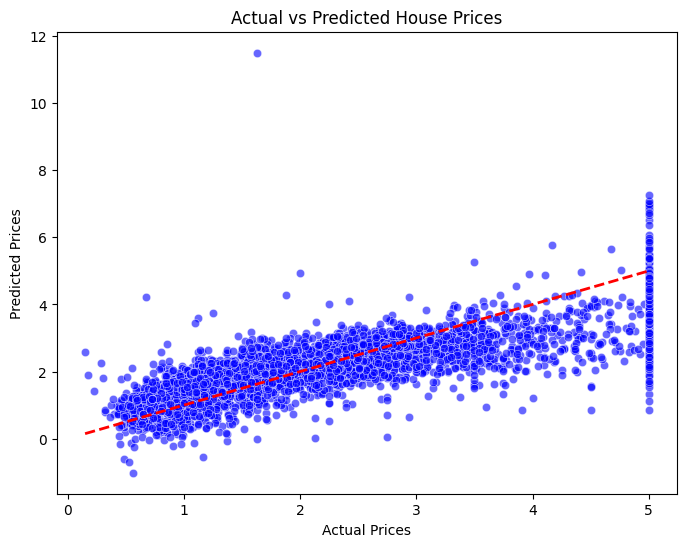

In [2]:
# 1. Actual vs Predicted Prices Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

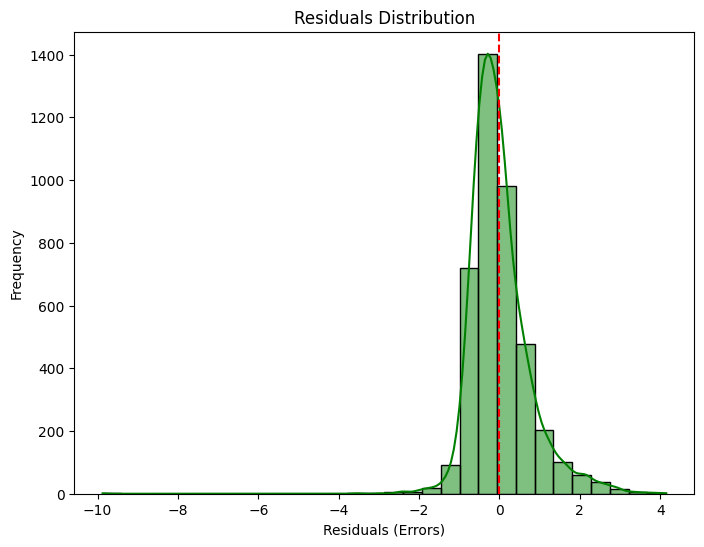

In [4]:
# 2. Residual Plot (Errors)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="green")
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

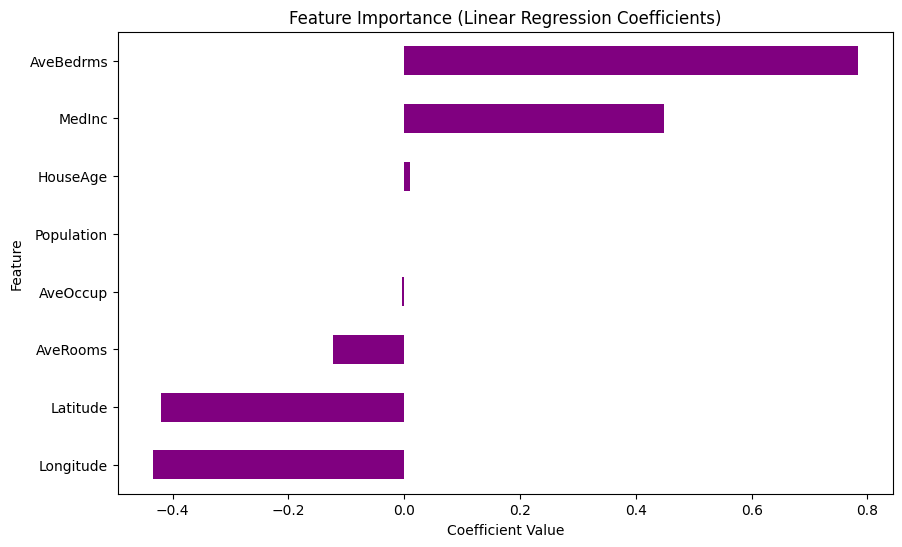

In [5]:
# 3. Feature Importance (Linear Regression Coefficients)
plt.figure(figsize=(10, 6))
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.sort_values().plot(kind='barh', color='purple')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()